# Initial Exploration

## 1. Introduction

This notebook performs an initial exploration of the *Music & Mental Health* dataset from Kaggle. The goals of this stage are to:

- Understand the structure, types, and dimensions of the data
- Identify and quantify missing or inconsistent values
- Summarize key features through descriptive statistics
- Explore distributions of relevant variables such as music preferences and mental health indicators
- Generate initial questions and hypotheses to guide further analysis

This exploratory phase will inform decisions about data cleaning, transformation, and modeling in subsequent stages of the project.

In [2]:
# Avoids caching source code in order to utilize the latest changes

%load_ext autoreload
%autoreload 2

In [106]:
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Statistics
from scipy import stats
import scikit_posthocs as sp

from music_and_mental_health_survey_analysis.config import RAW_DATA_DIR, FIGURES_DIR

## 2. Load and Preview the Dataset

In [4]:
# Load data

df = pd.read_csv(RAW_DATA_DIR / 'mxmh_survey_results.csv')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [5]:
# Shape of data

print(f"Rows: {df.shape[0]}, Cols: {df.shape[1]}")

Rows: 736, Cols: 33


In [6]:
# Column names

df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [7]:
# Dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

### Summary

- The dataset contains **736 entries**, a solid sample size for analysis.
- Most features have **no missing values**. A few columns, such as *OCD* and *Instrumentalist* contain minmor gaps. *BPM* is the only feature with a substantial missing rate (~15%).
- This dataset contains **many categorial features** and only a few continuous or numeric features.
- The majority of columns are `object` type, meaning some type conversions and cleaning will be necessary for analysis and modeling.

## 3. Data Types and Distributions

In [8]:
# Feature datatypes

df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


### Floating-point Features

In [9]:
# Select floating point features

fp_data = df.select_dtypes(include='float64')
fp_data

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
0,18.0,3.0,156.0,3.0,0.0,1.0,0.0
1,63.0,1.5,119.0,7.0,2.0,2.0,1.0
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...
731,17.0,2.0,120.0,7.0,6.0,0.0,9.0
732,18.0,1.0,160.0,3.0,2.0,2.0,5.0
733,19.0,6.0,120.0,2.0,2.0,2.0,2.0
734,19.0,5.0,170.0,2.0,3.0,2.0,1.0


In [10]:
# Investigate mental illness features

illness_features = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
mi_df = fp_data[illness_features]
mi_df.describe()

,Anxiety,Depression,Insomnia,OCD
count,736.000000,736.000000,736.000000,736.000000
mean,5.837636,4.796196,3.738451,2.637228
std,2.793054,3.028870,3.088689,2.842017
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,1.000000,0.000000
50%,6.000000,5.000000,3.000000,2.000000
75%,8.000000,7.000000,6.000000,5.000000
max,10.000000,10.000000,10.000000,10.000000


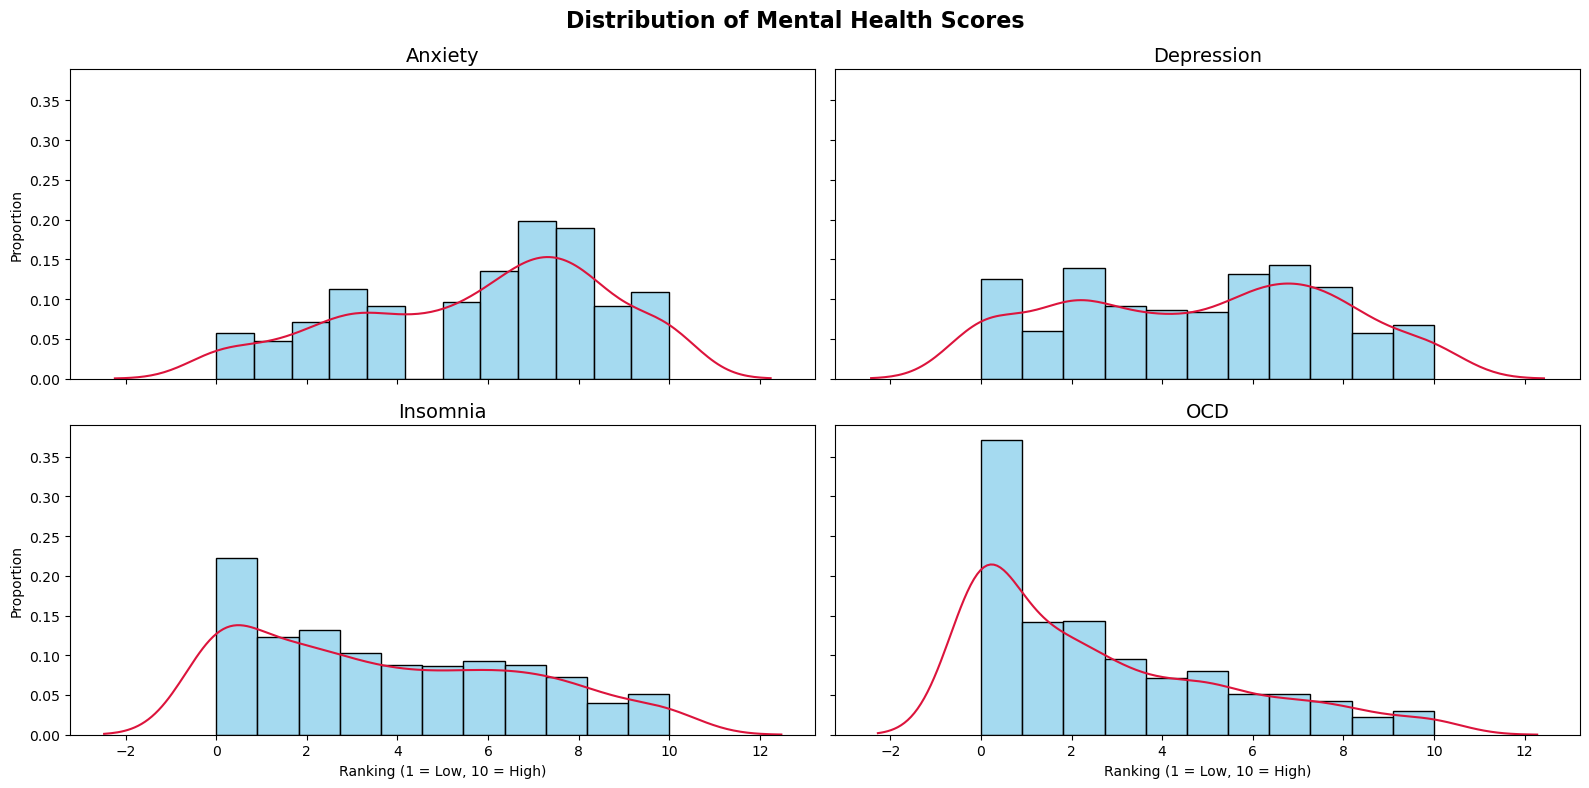

In [11]:
# Visualize mental illness features
fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True, figsize=(16, 8))

axes = ax.flatten()
fig.suptitle('Distribution of Mental Health Scores', fontsize=16, fontweight='bold')

# Plot data for each feature
for i, feature in enumerate(illness_features):
    sns.histplot(data=mi_df[feature].dropna(), stat='density', ax=axes[i], color='skyblue')
    sns.kdeplot(data=mi_df[feature].dropna(), color='crimson', ax=axes[i])
    axes[i].set_title(f"{feature}", fontsize=14)
    axes[i].set_xlabel('Ranking (1 = Low, 10 = High)')
    axes[i].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

# Save figure
fig.savefig(FIGURES_DIR / 'mental_health_distributions.png', dpi=300, bbox_inches='tight')

In [12]:
# Investigate other continuous features
continuous_features = ['Age', 'Hours per day', 'BPM']

fp_data[continuous_features].describe()

,Age,Hours per day,BPM
count,735.000000,736.000000,6.290000e+02
mean,25.206803,3.572758,1.589948e+06
std,12.054970,3.028199,3.987261e+07
min,10.000000,0.000000,0.000000e+00
25%,18.000000,2.000000,1.000000e+02
50%,21.000000,3.000000,1.200000e+02
75%,28.000000,5.000000,1.440000e+02
max,89.000000,24.000000,1.000000e+09


In [13]:
# Investigate extreme BPM values

fp_data[(fp_data['BPM'] > 220) | (fp_data['BPM'] < 40)]

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
339,35.0,3.0,0.0,8.0,2.0,2.0,8.0
372,18.0,2.0,20.0,10.0,7.0,2.0,0.0
429,73.0,3.0,4.0,5.0,4.0,0.0,1.0
524,28.0,3.0,0.0,8.0,8.0,5.0,2.0
567,68.0,1.0,8.0,10.0,10.0,10.0,0.0
568,16.0,7.0,999999999.0,4.0,8.0,8.0,4.0
639,30.0,0.0,0.0,10.0,10.0,10.0,9.0
644,16.0,4.0,624.0,4.0,7.0,1.0,3.0


In [14]:
# Drop extremes

fp_data = fp_data[(fp_data['BPM'] <= 220) & (fp_data['BPM'] >= 40)]
fp_data.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000
mean,24.616747,3.721739,123.758454,5.854267,4.859903,3.807568,2.639291
std,11.441491,3.097067,32.028258,2.764131,3.000084,3.103134,2.844832
min,10.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,100.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,120.000000,6.000000,5.000000,3.000000,2.000000
75%,27.000000,5.000000,144.000000,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,220.000000,10.000000,10.000000,10.000000,10.000000


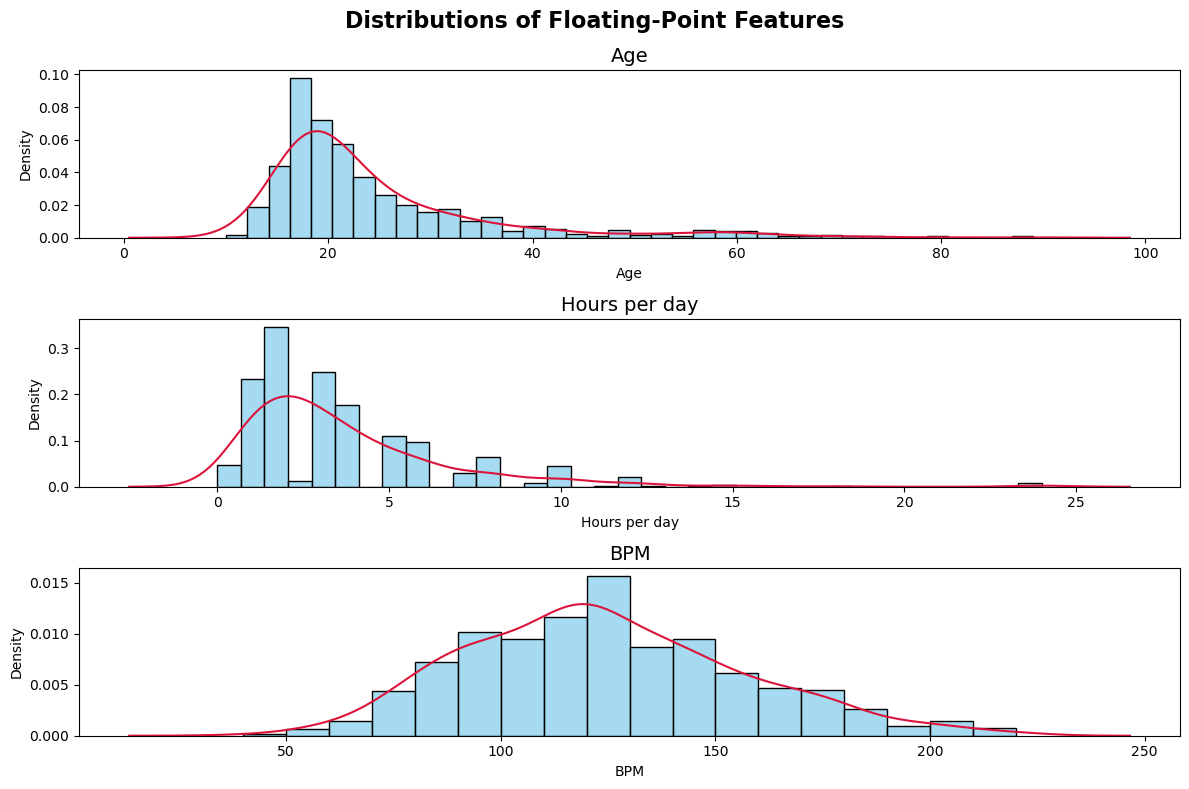

In [15]:
# Visualize distribution of continuous vars

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,8))
fig.suptitle('Distributions of Floating-Point Features', fontsize=16, fontweight='bold')

axes = ax.flatten()

# Plot kde hist plots of each feature
for i, feature in enumerate(continuous_features):
    sns.histplot(data=fp_data[feature].dropna(), stat='density', color='skyblue', ax=axes[i])
    sns.kdeplot(data=fp_data[feature].dropna(), color='crimson', ax=axes[i])
    axes[i].set_title(f"{feature}", fontsize=14)
    axes[i].set_xlabel(f"{feature}")
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

# Save figure
fig.savefig(FIGURES_DIR / 'floating_point_distributions.png', bbox_inches = 'tight', dpi=300)

#### Summary

- The `Anxiety`, `Depression`, `Insomnia`, and `OCD` features are **ordinal features** with values ranging from **0 to 10**
- The **average age** of participants is approximately **25 years old**, with the majority between **18 and 27**
- The **Hours per day** features contains some extreme values
  - **3 participants** listened to music for **24 hours per day**
  - **6 participants** listened to music for **0 hours per day**
  - The **mean** is approximately **3.7 hours per day**
- The **BPM** feature has some **extreme outliers** with values reaching into the million
  - Afrter cleaning, the **distribution resembles a normal distribution** within the expected BPM range (roughly 40-220)

### `Frequency` Features

In [16]:
# Select frequency features

frequency_cols = df.columns[df.columns.str.startswith('Fr')]
df[frequency_cols]

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes
1,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely
2,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently
3,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never
4,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never
732,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes
733,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely
734,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes


In [17]:
# Check range of values

df[frequency_cols].describe()

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
count,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736
unique,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
top,Rarely,Never,Never,Never,Never,Sometimes,Never,Never,Never,Never,Never,Very frequently,Never,Rarely,Very frequently,Never
freq,259,343,307,292,535,218,261,416,443,280,264,277,225,215,330,236


In [18]:
# Create dataframe with counts 

frequency_df = pd.DataFrame()

for genre in frequency_cols:
    counts = df[genre].value_counts()
    frequency_df[genre.replace('Frequency ', '')[1:-1]] = counts

frequency_df = frequency_df.sort_index()
#frequency_df.index = [genre.replace('Frequency ', '') for genre in frequency_df.index]
frequency_df

,Classical,Country,EDM,Folk,Gospel,Hip hop,Jazz,K pop,Latin,Lofi,Metal,Pop,R&B,Rap,Rock,Video game music
Frequency [Classical],,,,,,,,,,,,,,,,
Never,169,343,307,292,535,181,261,416,443,280,264,56,225,200,91,236
Rarely,259,233,194,221,135,214,247,176,172,211,192,142,211,215,96,197
Sometimes,200,111,146,145,52,218,175,67,88,160,134,261,184,195,219,186
Very frequently,108,49,89,78,14,123,53,77,33,85,146,277,116,126,330,117


In [19]:
# Create color palette for genres to maintain between visualizations

genre_list = df['Fav genre'].dropna().unique()
palette = sns.color_palette(palette='tab20', n_colors=len(genre_list))

genre_colors = dict(zip(genre_list, palette))

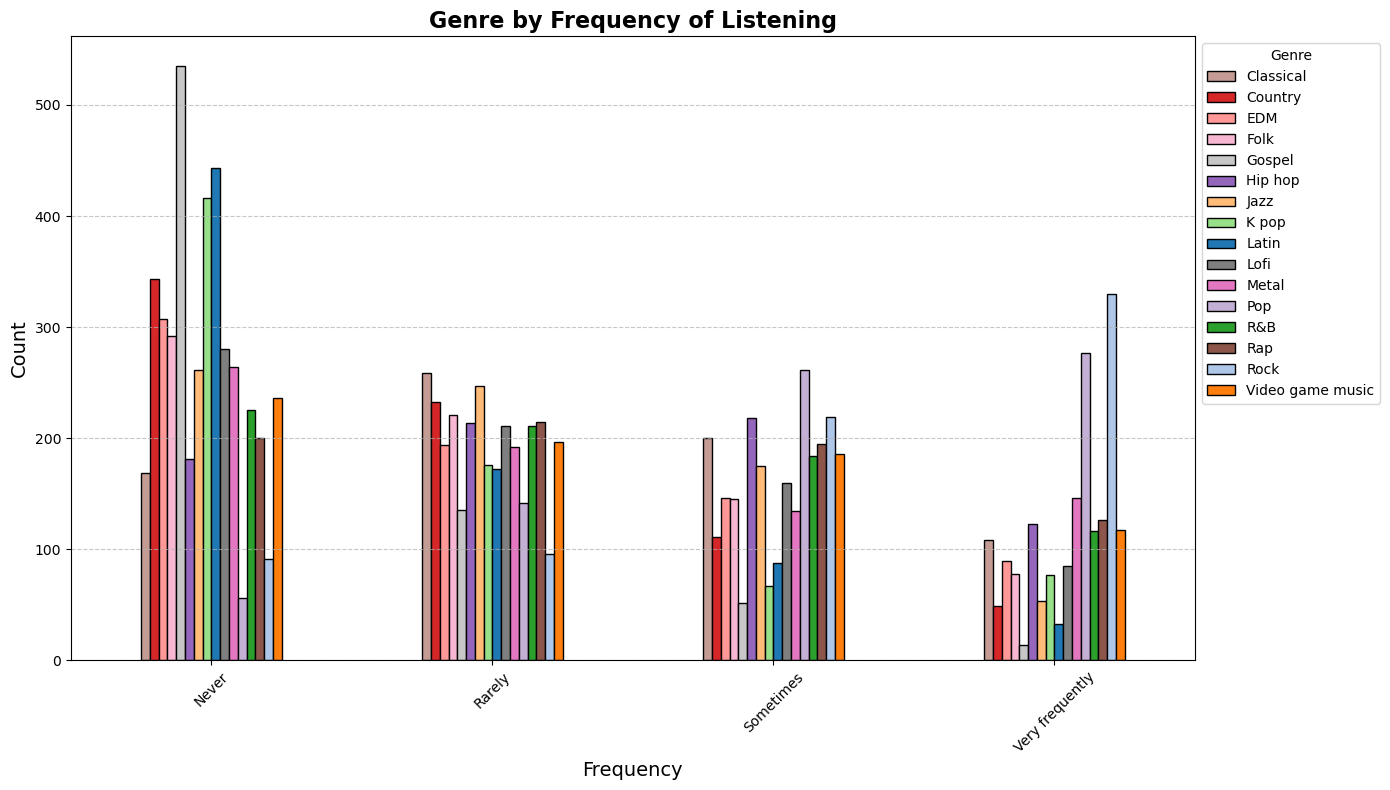

In [20]:
# Plot frequencies

frequency_df.plot(kind='bar', figsize=(14,8), color=[genre_colors[genre] for genre in frequency_df.columns], edgecolor='black')

plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.title('Genre by Frequency of Listening', fontsize=16, weight='bold')
plt.ylabel('Count', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'genre_by_frequency.png', dpi=300, bbox_inches='tight')

plt.show()

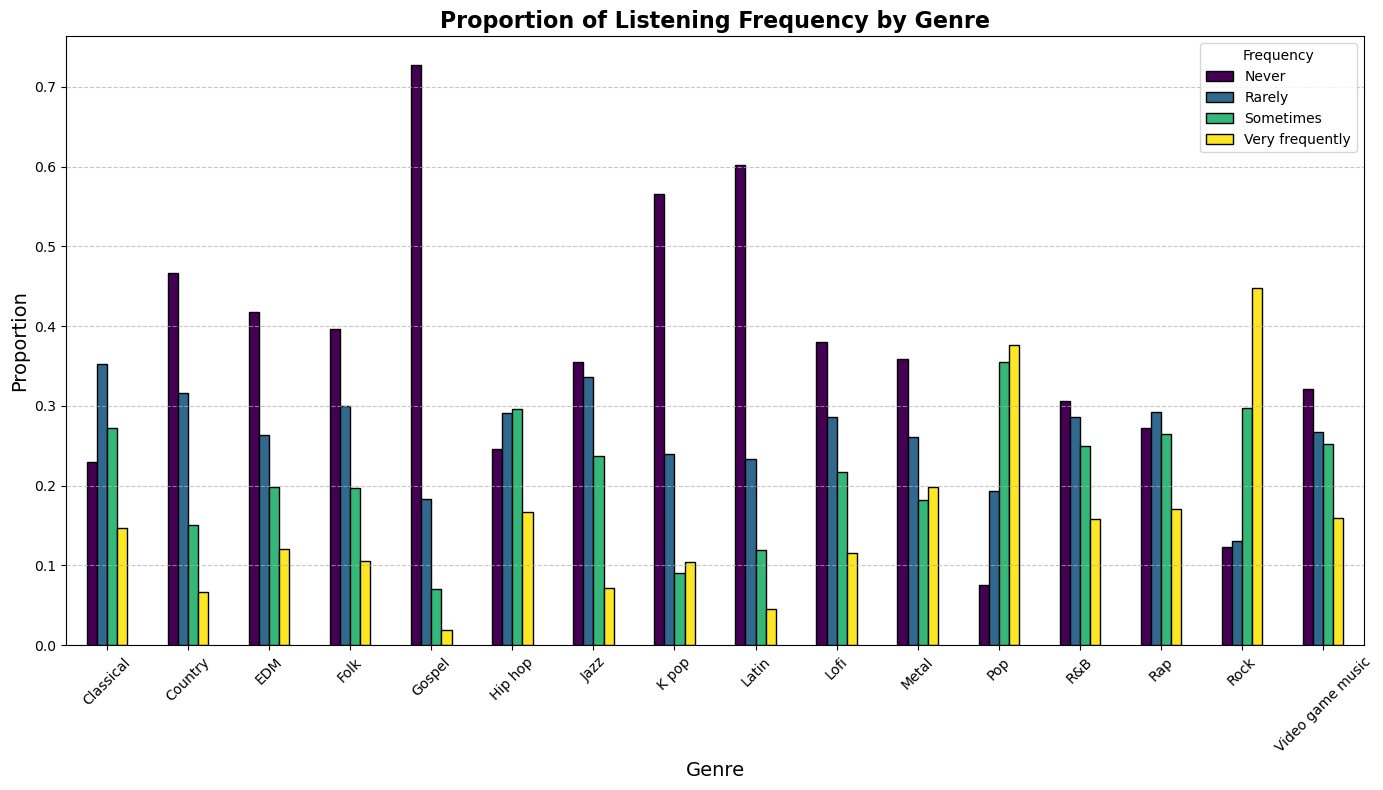

In [21]:
# Plot frequency by genre

frequency_df = frequency_df.div(frequency_df.sum(axis=0)).T.fillna(0)
frequency_df.plot(kind='bar', figsize=(14,8), colormap='viridis', edgecolor='black')

plt.legend(title='Frequency', bbox_to_anchor=(1, 1))
plt.title('Proportion of Listening Frequency by Genre', fontsize=16, weight='bold')
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'proportion_frequency_by_genre.png', dpi=300, bbox_inches='tight')

plt.show()

#### Summary

- The `Frequency` columns represent **ordinal data**, ranging from *Never* to *Very frequently*.
- **Gospel**, **Latin**, and **K Pop** are the top three genres most frequently marked as *Never* listened to.
- **Rock**, **Pop**, and **Metal** are the top three genres most frequently marked as *Very frequently* listened to.
- Only **Rock** and **Pop** have higher counts in the *Sometimes* and *Very frequently* categories than in *Never* and *Rarely*.
  - This indicates that they are **more regularly** listened to overall.

### Yes/No Features

In [22]:
# Describe binary features

bin_features = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']
bin_df = df[bin_features]
bin_df.describe()

,While working,Instrumentalist,Composer,Exploratory,Foreign languages
count,733,732,735,736,732
unique,2,2,2,2,2
top,Yes,No,No,Yes,Yes
freq,579,497,609,525,404


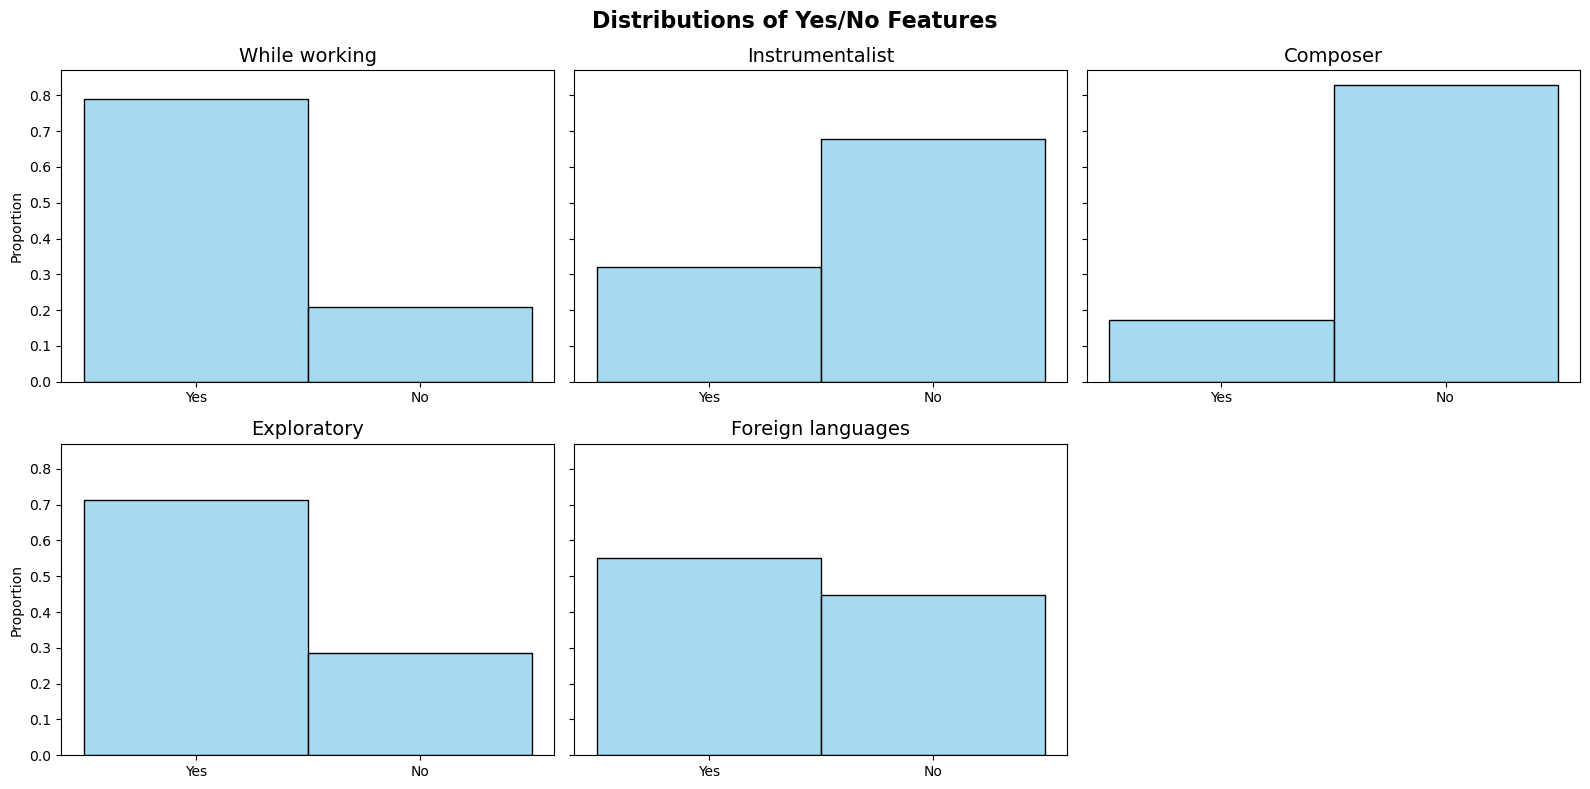

In [23]:
# Plot distributions of binary features

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8), sharey=True)
fig.suptitle('Distributions of Yes/No Features', fontsize=16, fontweight='bold')

axes = ax.flatten()

# Plot histograms
for i, feature in enumerate(bin_features):
    sns.histplot(data=bin_df[feature], ax=axes[i], stat='proportion', color='skyblue')
    axes[i].set_title(f"{feature}", fontsize=14)
    axes[i].set_xlabel('')

fig.delaxes(axes[-1])
plt.tight_layout()
fig.savefig(FIGURES_DIR / 'yes_no_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_13307/239101372.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bin_df = bin_df.replace({'Yes':1, 'No':0})


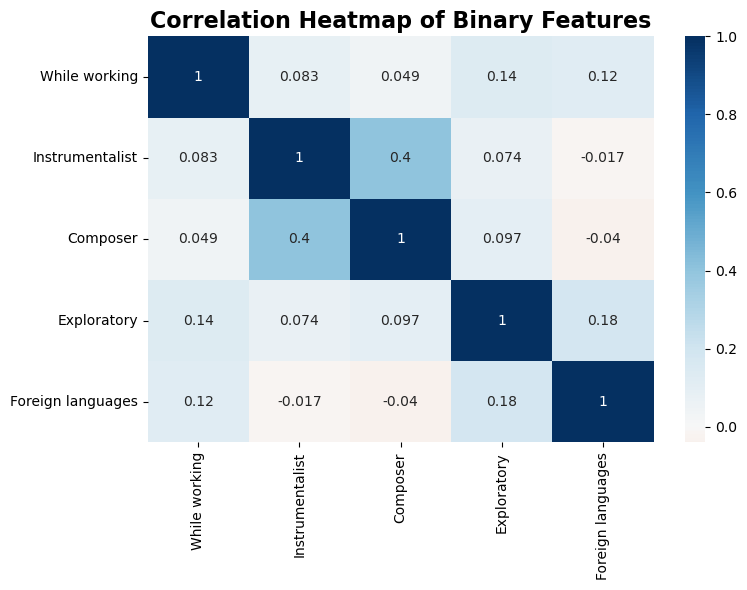

In [24]:
# Visualize correlation between binary features

# Convert Yes/No to binary ints in order to calculate correlation matrix
bin_df = bin_df.replace({'Yes':1, 'No':0})
corr_matrix = bin_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data=corr_matrix, annot=True, cmap='RdBu', center=0)
plt.title("Correlation Heatmap of Binary Features", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'binary_feature_heatmap.png', dpi=300, bbox_inches = 'tight')
plt.show()

#### Summary
- The **majority of participants** are not **Instrumentalists** or **Composers**.
- There is a **strong positive correlation** between being an **Instrumentalist** and **Composers**.
- Approximately **80% of participants** report listening to music **While working**.
- Approximately **70% of participants** identify as **Exploratory** in their music preferences.

### `Fav genre`

In [25]:
# Counts of values in Fav genre

df['Fav genre'].value_counts()

Fav genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
Hip hop              35
R&B                  35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: count, dtype: int64

In [26]:
print(f"# of missing in Fav genre: {df['Fav genre'].isna().sum()}")

# of missing in Fav genre: 0


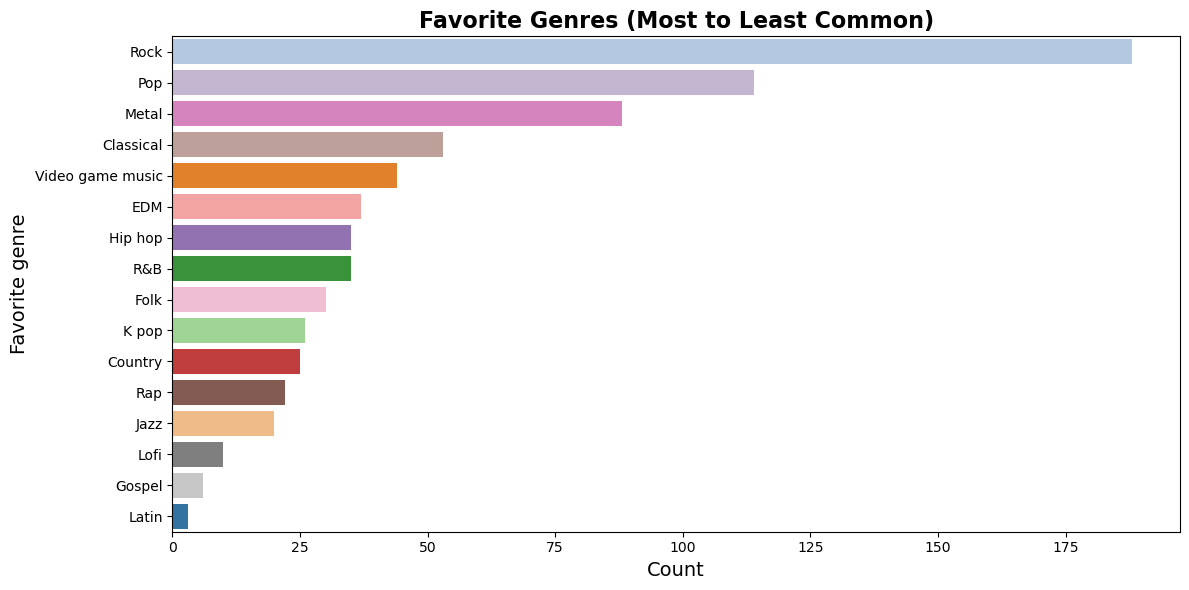

In [27]:
# Visualize distribution of favorite genre

# Get order from most to least common genre
genre_order = df['Fav genre'].value_counts().index

plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Fav genre', order=genre_order, hue='Fav genre', palette=genre_colors, legend=False)

plt.title('Favorite Genres (Most to Least Common)', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Favorite genre', fontsize=14)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'favorite_genres_counts.png', dpi=300, bbox_inches='tight')
plt.show()

#### Summary
- **Rock** and **Pop** are the most frequently reported favorite genres.
- **Latin** and **Gospel** are least frequently selected as favorites.
- These preferences align with the overall **listening frequency** patterns observed for each genre.
  - This suggests a **consistent relationship** between favorite genres and how often they are listened to.

### Primary Streaming Service

In [28]:
# Counts of streaming services used

df['Primary streaming service'].value_counts()

Primary streaming service
Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: count, dtype: int64

In [29]:
print(f"Number of missing values: {df['Primary streaming service'].isna().sum()}")

Number of missing values: 1


#### Summary

- **Spotify** is the most frequently reported streaming service used.
- There is **1 missing entry** for `primary streaming service`.

### Music effects

In [30]:
df['Music effects'].value_counts(normalize=True)

Music effects
Improve      0.744505
No effect    0.232143
Worsen       0.023352
Name: proportion, dtype: float64

/tmp/ipykernel_13307/3520353726.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df['Music effects'].sort_values(), palette='viridis')


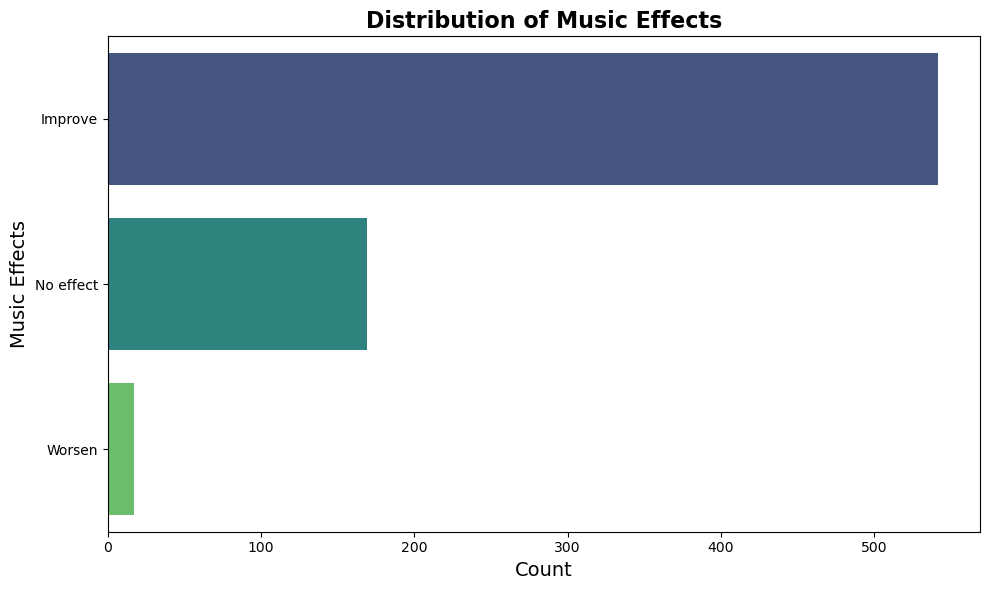

In [31]:
# Visualize distribution of music effects

plt.figure(figsize=(10,6))
sns.countplot(data=df['Music effects'].sort_values(), palette='viridis')
plt.title("Distribution of Music Effects", fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Music Effects', fontsize=14)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'music_effects_count.png', dpi=300, bbox_inches='tight')
plt.show()

#### Summary

- There is a **significant class imbalance** in `Music  effects`. Only **0.02%** of respondents worsened following music therapy, and approximately **75%** of respondents improved.

### Permissions

In [32]:
df['Permissions'].value_counts()

Permissions
I understand.    736
Name: count, dtype: int64

#### Summary
- The `Permissions` column has a static value.

## 4. Missing Data

In [33]:
missing_cols = df.columns[df.isna().sum() > 0]

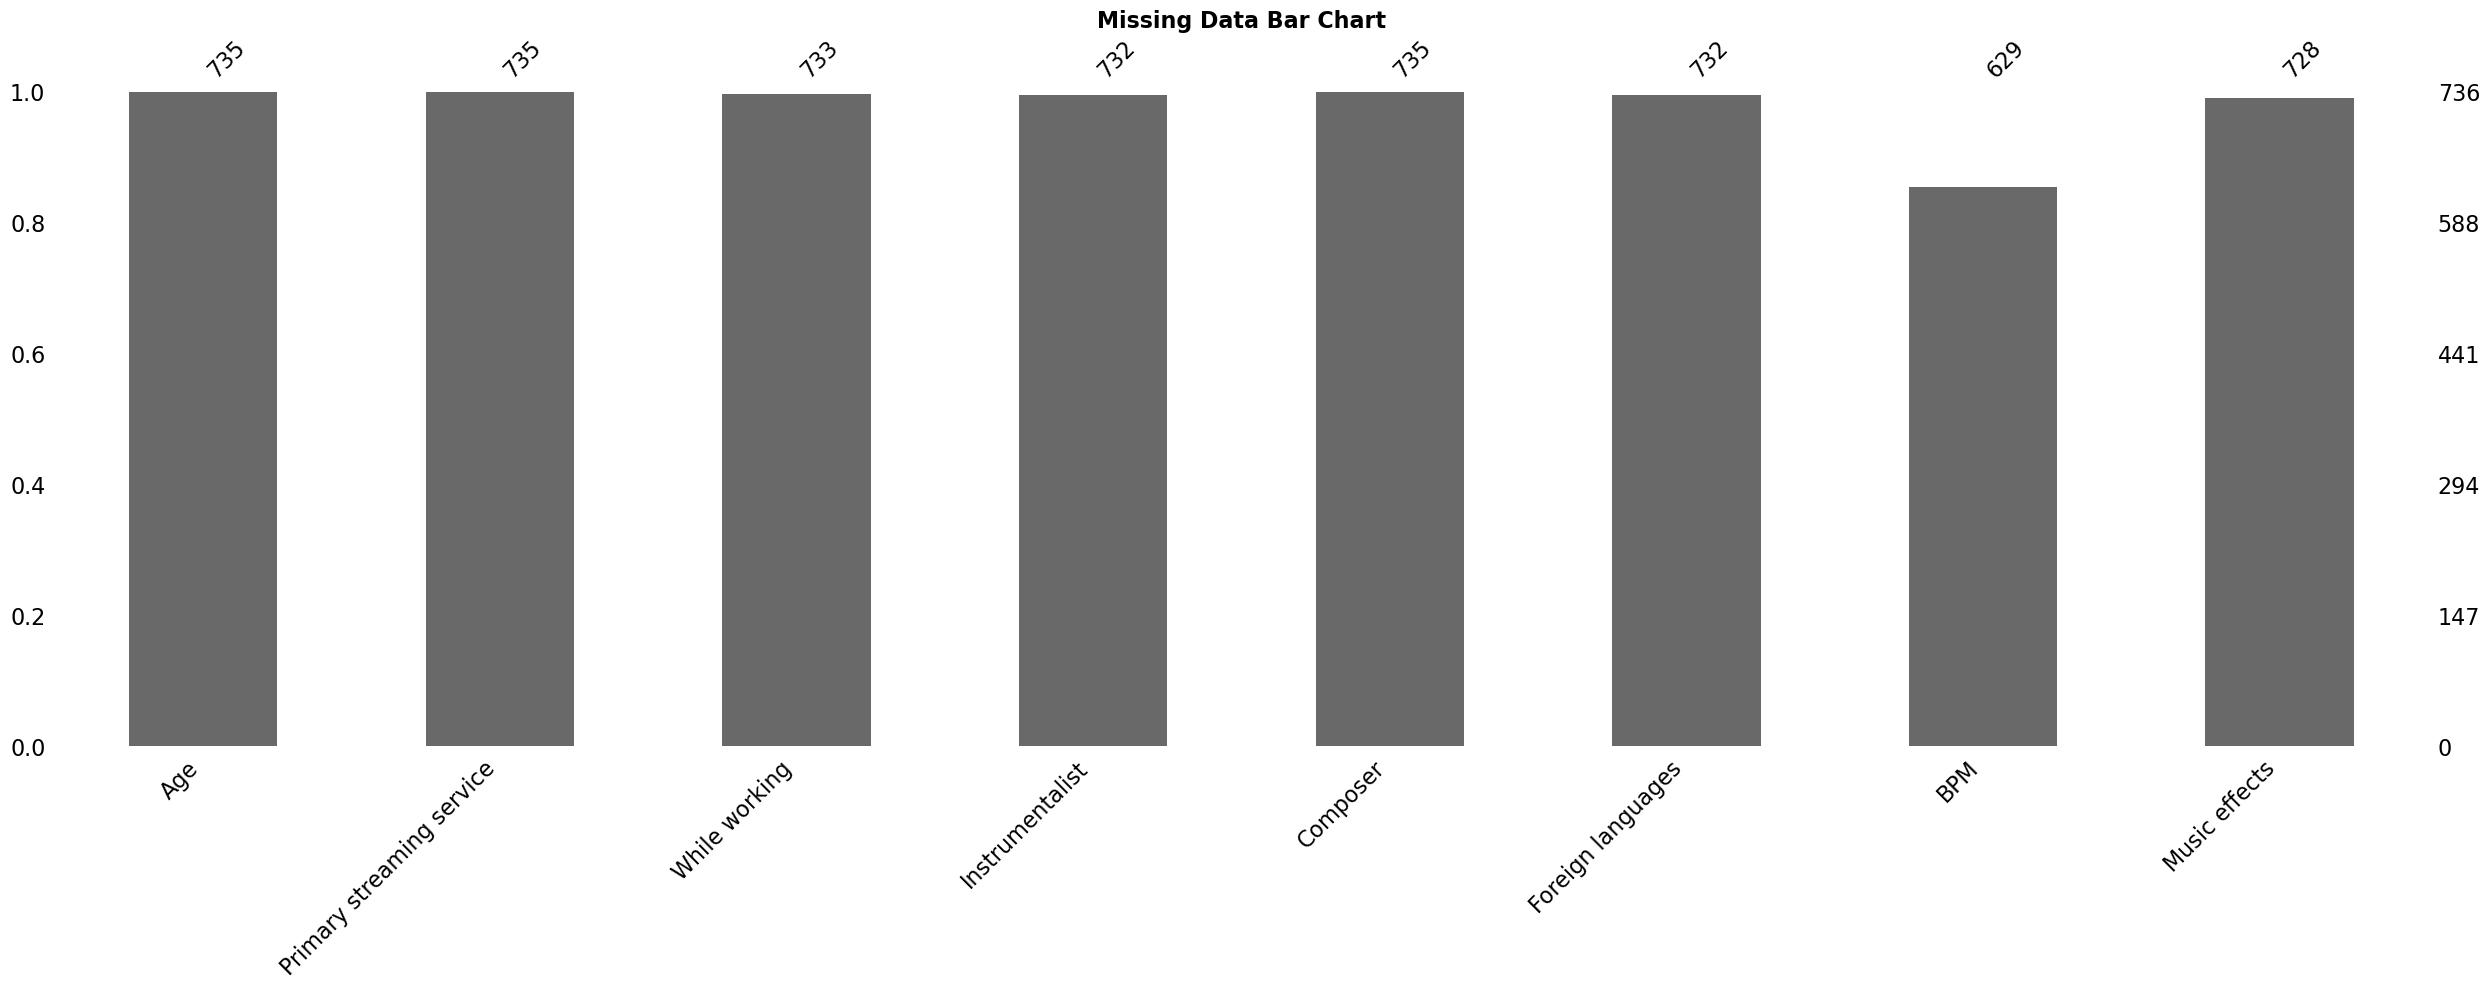

In [34]:
msno.bar(df[missing_cols])
plt.title("Missing Data Bar Chart", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

The columns with missing data are not missing a significant enough amount to impact our analysis. `BPM` is the only column missing a more significant proportion of data.

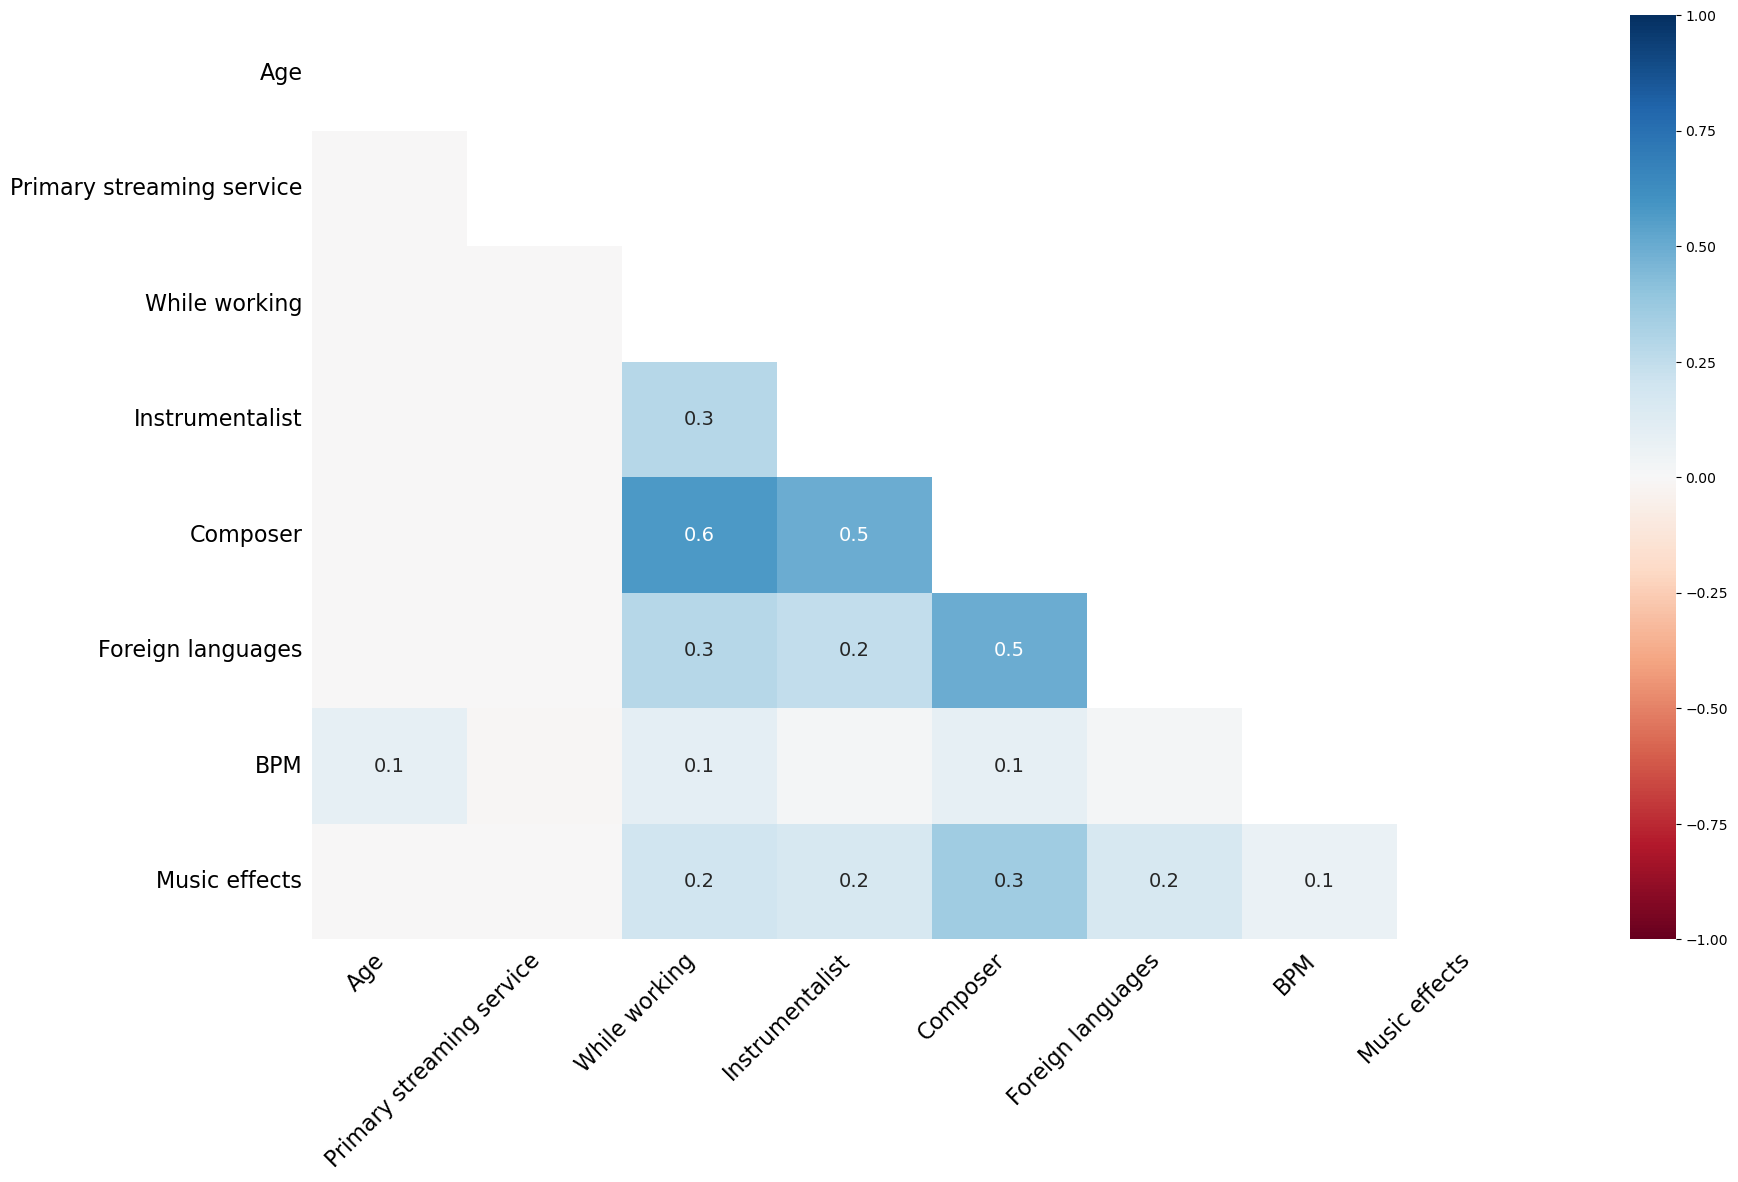

In [35]:
msno.heatmap(df[missing_cols])

plt.show()

There is a **strong positive correlation** in missingness between `Composer` and some of the other columns. Since only 1 entry is missing a value for Composer, these correlations are *insignificant*.

### BPM

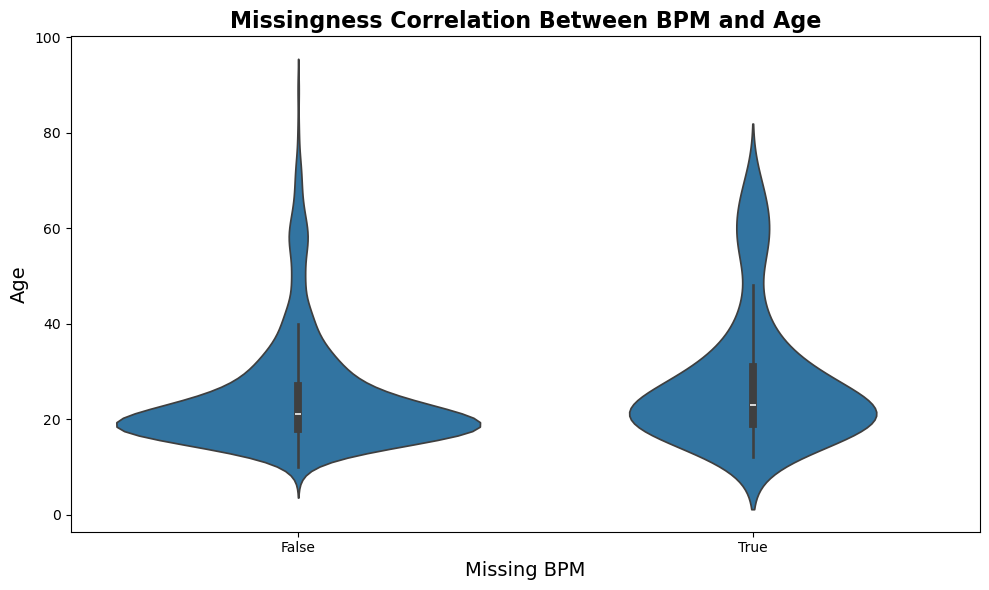

In [36]:
# Compare BPM missingness to age

# Create binary column for BPM missingness
df['BPM_missing'] = df['BPM'].isna()

plt.figure(figsize=(10,6))
plt.title('Missingness Correlation Between BPM and Age', fontsize=16, fontweight='bold')
sns.violinplot(data=df, x='BPM_missing', y='Age')

plt.xlabel('Missing BPM', fontsize=14)
plt.ylabel('Age', fontsize=14)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'missingness_age_bpm.png', dpi=300, bbox_inches='tight')
plt.show()

**Null hypothesis**: There is no significant difference in mean Age between responses missing a BPM and responses with a BPM.

**Alternative hypothesis**: There is a significant difference in mean Age between responses missing a BPM and responses witha BPM.

In [37]:
# Perform t-test comparing mean age between two groups

age_with_bpm = df[df['BPM_missing'] == False]['Age'].dropna()
age_without_bpm = df[df['BPM_missing'] == True]['Age'].dropna()

t_stat, p_value = stats.ttest_ind(age_with_bpm, age_without_bpm)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: -2.482909572877011, p-value: 0.013254079250849605


- With a **p-value of 0.01** we can reject the null hypothesis that there is no significant different in mean Age between the two groups.
- Respondents who entered a BPM are on average **2.48 years younger** than respondents who left it blank.

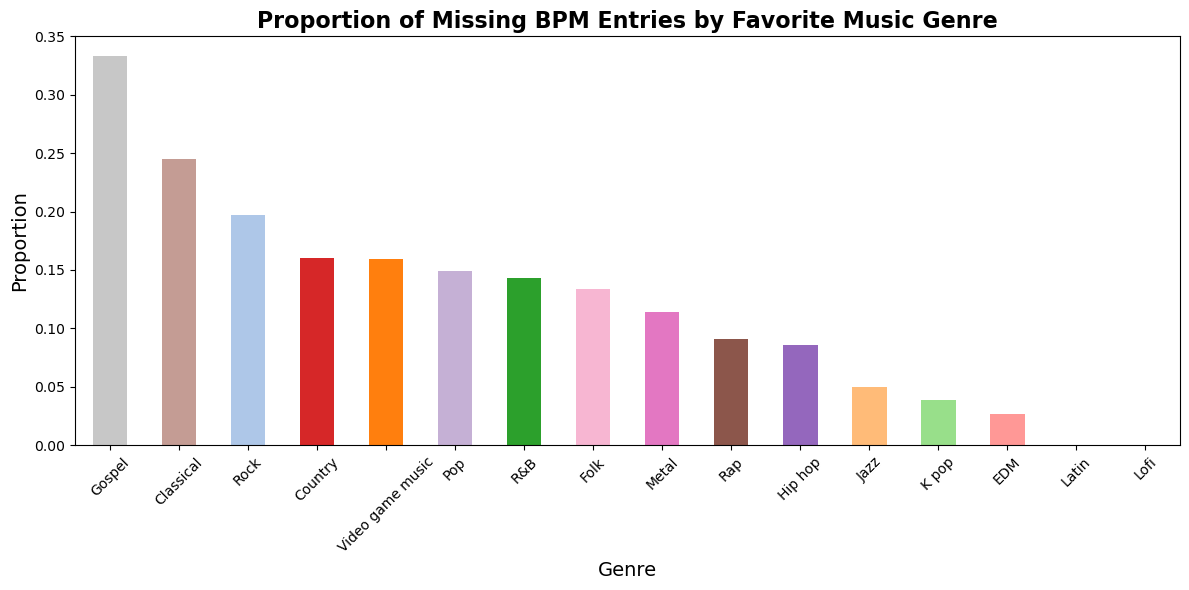

In [38]:
# Plot proportion of each favorite genre entry missing BPM
fav_genre_missing_bpm = df.groupby(by='Fav genre')['BPM_missing'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.title('Proportion of Missing BPM Entries by Favorite Music Genre', fontsize=16, fontweight='bold')
fav_genre_missing_bpm.plot(kind='bar', color=[genre_colors[genre] for genre in fav_genre_missing_bpm.index])

plt.xlabel('Genre', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'proportion_missing_bpm_fav_genre.png', dpi=300, bbox_inches='tight')
plt.show()

**Null hypothesis**: There is no relationship between a respondent's favorite genre and whether or not they entered a BPM.

**Alternative hypothesis**: There is a dependent relationship between a respondent's favorite genre and them inputting a BPM.

In [39]:
# Perform chi-squared test to check significance

contingency = pd.crosstab(df['Fav genre'], df['BPM_missing'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected: \n{expected}")

Chi-Squared Statistic: 22.60623340826153
P-value: 0.09286564156064168
Degrees of Freedom: 15
Expected: 
[[ 45.29483696   7.70516304]
 [ 21.36548913   3.63451087]
 [ 31.62092391   5.37907609]
 [ 25.63858696   4.36141304]
 [  5.12771739   0.87228261]
 [ 29.91168478   5.08831522]
 [ 17.0923913    2.9076087 ]
 [ 22.2201087    3.7798913 ]
 [  2.5638587    0.4361413 ]
 [  8.54619565   1.45380435]
 [ 75.20652174  12.79347826]
 [ 97.42663043  16.57336957]
 [ 29.91168478   5.08831522]
 [ 18.80163043   3.19836957]
 [160.66847826  27.33152174]
 [ 37.60326087   6.39673913]]


With a **p-value of 0.09** we cannot reject the null hypothesis.

### Summary

- Except for `BPM`, columns with missing data have minimal missingness and are unlikely to affect analysis.
- There is a **strong positive correlation** between missingness between `Composer` and the variables `Instrumentalist`, `While working`, and `Foreign Languages`.
  - However, since only **one row** is missing a `Composer` entry, these correlations are not meaningful and cannot be reliably investigated.
- There is evidence of a **relationship between BPM missingness and participant age**.
  - A **t-test** yielded a **p-value of 0.01**, indicating that participants missing a BPM entry tend to be older than those who provided one.
- There is **no significant relationship** between `Fav genre` and whether a `BPM` value was entered.

## 5. Relationships Between Variables

### Mental Illnesses

Are there correlations between mental illness scores?

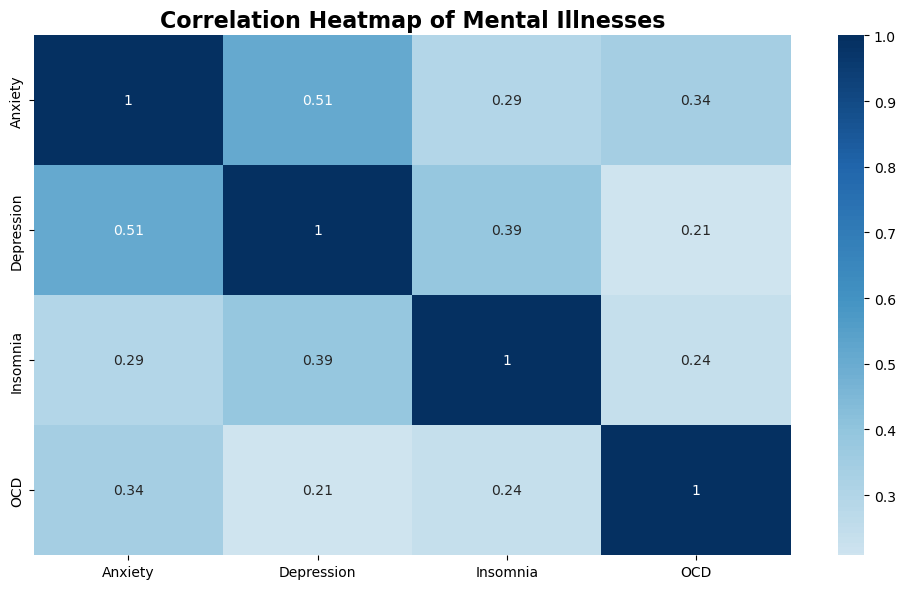

In [40]:
# Plot correlations between mental illnesses
illness_correlations = df[illness_features].corr(method='spearman')

plt.figure(figsize=(10,6))
sns.heatmap(data=illness_correlations, annot=True, cmap='RdBu', center=0)
plt.title("Correlation Heatmap of Mental Illnesses", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'illness_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

Based on the heatmap, we can identify a **strong positive correlation** between Depression and Anxiety. A *Spearman Correlation Significance Test* will determine whether this relationship is statistically significant.

- **Null Hypothesis**: The correlation between *Depression* and *Anxiety* is due to chance.
- **Alternative Hypothesis**: The correlation between *Depression* and *Anxiety* is not due to chance.

In [41]:
# Perform spearman test

r, p_value = stats.spearmanr(df['Depression'], df['Anxiety'])
print(f"Correlation: {r:.3f}, p-value: {p_value:.3f}")

Correlation: 0.512, p-value: 0.000


Since our **p-value < 0.05** we can **reject** the null hypothesis that the correlation between Depression and Anxiety is due to chance.

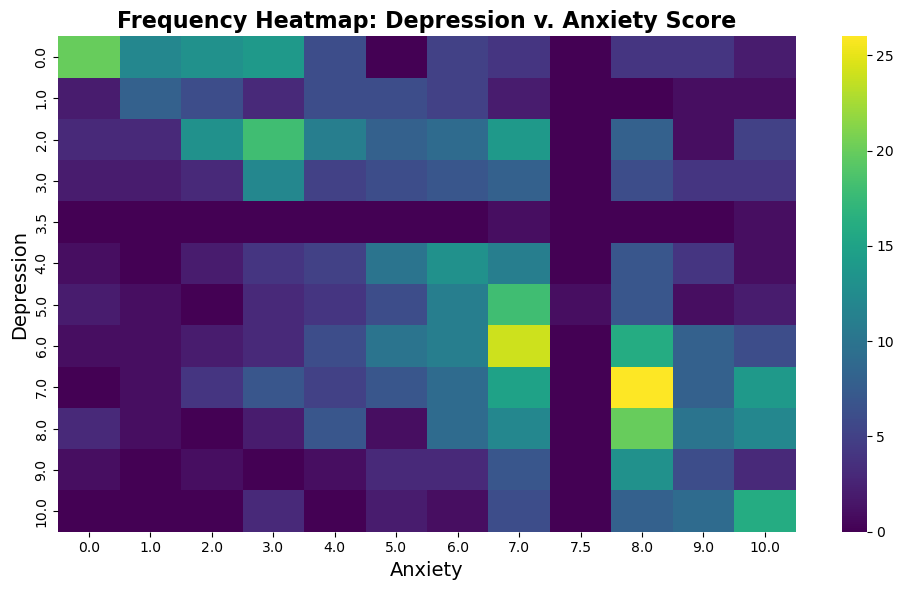

In [42]:
# Plot frequency heatmap of Anxiety and Depression

illness_freq = df.pivot_table(index='Depression', columns='Anxiety', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
plt.title("Frequency Heatmap: Depression v. Anxiety Score", fontsize=16, fontweight='bold')
sns.heatmap(illness_freq, cmap='viridis')

plt.xlabel('Anxiety', fontsize=14)
plt.ylabel('Depression', fontsize=14)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'depression_anxiety_freq_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

#### Summary

- A **statistically significant, moderately strong positive correlation** exists between reported `Depression` and `Anxiety` scores (r=0.520, p < 0.001).
- The relationship is **approximately linear**.
- The **highest concentrations** of responses occur when:
  - **Anxiety scores are 7 and 8**.
  - **Depression scores are 6 and 7**.
- This indicates that respondents with **moderate to high anxiety** also tend to report **moderate to high depression**.

### Mental Illnesses and Hours per day

Does a statistically significant relationship exist between the number of hours per day a respondent listened to music, and their reported levels of mental illness?

/tmp/ipykernel_13307/795304485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=illness_hours_correlations.index, y=illness_hours_correlations.values.flatten(), palette='viridis')


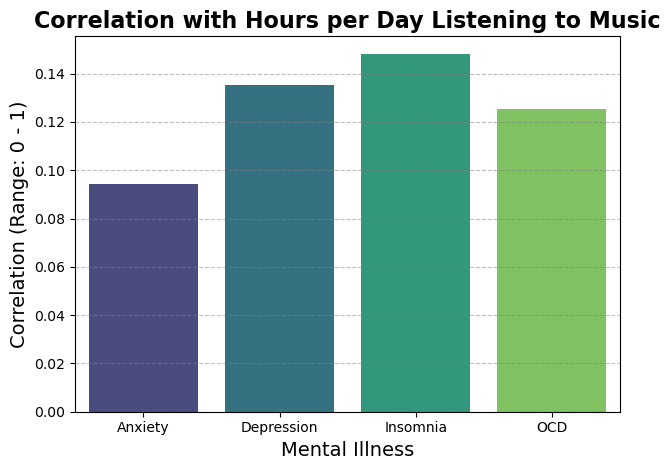

In [43]:
# Calculate and plot correlation bar plot between mental illnesses and Hours per day
illness_hours = illness_features + ['Hours per day']
illness_hours_correlations = df[illness_hours].corr(method='spearman')
illness_hours_correlations = illness_hours_correlations.drop(labels=illness_features, axis=1).drop('Hours per day', axis=0)

plt.title('Correlation with Hours per Day Listening to Music', fontsize=16, fontweight='bold')
sns.barplot(x=illness_hours_correlations.index, y=illness_hours_correlations.values.flatten(), palette='viridis')
plt.xlabel('Mental Illness', fontsize=14)
plt.ylabel('Correlation (Range: 0 - 1)', fontsize=14)
plt.grid(axis='y', alpha=0.5, linestyle='--', color='gray')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'hours_per_day_illness_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

In [44]:
# Check significance of Insomnia correlation

r, p_value = stats.spearmanr(df['Insomnia'], df['Hours per day'])
print(f"Correlation: {r:.3f}, p-value: {p_value:.3f}")

Correlation: 0.148, p-value: 0.000


#### Summary

- Although the correlation between `Insomnia` and `Hours per day` is **statistically significant**, the relationship (r=0.14) is **weak**, suggesting a limited practical association.

### Music Effects

Are there any features which significantly impact `music effects`?

In [45]:
# Map categorical music effects to int

df['Music_effects_int'] = df['Music effects'].fillna('No effect').map({'Improve': 1, 'No effect': 0, 'Worsen': -1})

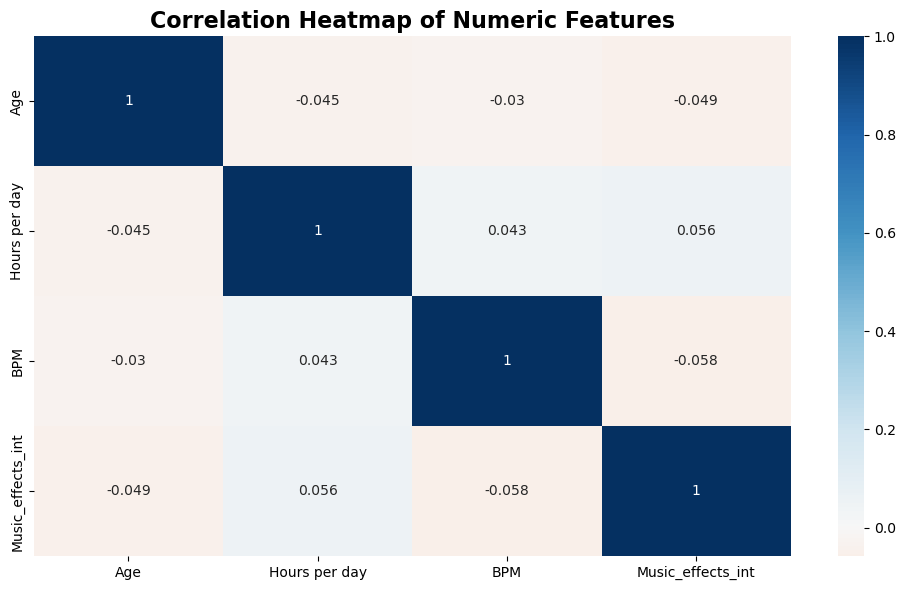

In [46]:
# Visualize correlations between numeric features including music effects

continuous_effects_corr = df[continuous_features + ['Music_effects_int']].corr()

plt.figure(figsize=(10, 6))
plt.title('Correlation Heatmap of Numeric Features', fontsize=16, fontweight='bold')
sns.heatmap(continuous_effects_corr, annot=True, cmap='RdBu', center=0)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'correlation_numeric.png', dpi=300, bbox_inches='tight')
plt.show()

Correlation coefficients are **negligible** between these numeric features and do not provide meaningful insights into the data.

/tmp/ipykernel_13307/1636802137.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Music effects', y='Hours per day', palette='viridis')


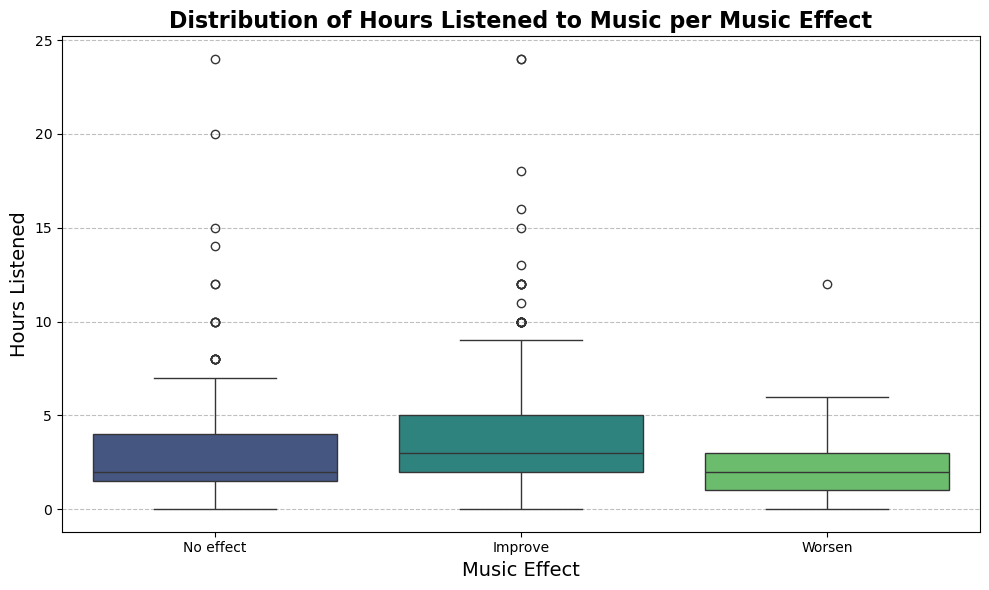

In [47]:
# Visualize distribution of hours listened per music effect

plt.figure(figsize=(10, 6))
plt.title("Distribution of Hours Listened to Music per Music Effect", fontsize=16, fontweight='bold')
sns.boxplot(data=df, x='Music effects', y='Hours per day', palette='viridis')

plt.xlabel('Music Effect', fontsize=14)
plt.ylabel('Hours Listened', fontsize=14)
plt.grid(axis='y', alpha=0.5, linestyle='--', color='gray')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'box_plot_hours_music_effect.png', dpi=300, bbox_inches='tight')
plt.show()

- Respondents in the *no effect* and *improve* groups spent **more hours** on average listening to music than those in the *worsen* group.
- There is only **one outlier** in the *worsen* group compared to numerous in the *no effect* and *improve* groups.

An **ANOVA** test will confirm whether there are statistically significant differences in `Hours per day` and `Music effects`.
- **Null hypothesis**: There is no difference in Hours listened to music per day between respondents in the *No effect*, *Improve*, or *Worsen* groups.
- **Alternative hypothesis**: There is a difference in `Hours per day` between respondents in the three `Music effects` groups.

In [48]:
# Perform ANOVA test comparing hours per day between music effect groups

no_effect_hours = df[df['Music effects'] == 'No effect']['Hours per day']
improve_hours = df[df['Music effects'] == 'Improve']['Hours per day']
worsen_hours = df[df['Music effects'] == 'Worsen']['Hours per day']

f_stat, p_value = stats.f_oneway(no_effect_hours, improve_hours, worsen_hours)
print(f"F-Statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

F-Statistic: 0.972, p-value: 0.379


Since the resulting p-value **is greater than 0.05**, we **cannot reject** the null hypothesis that there is no statistically significant difference between the three groups.

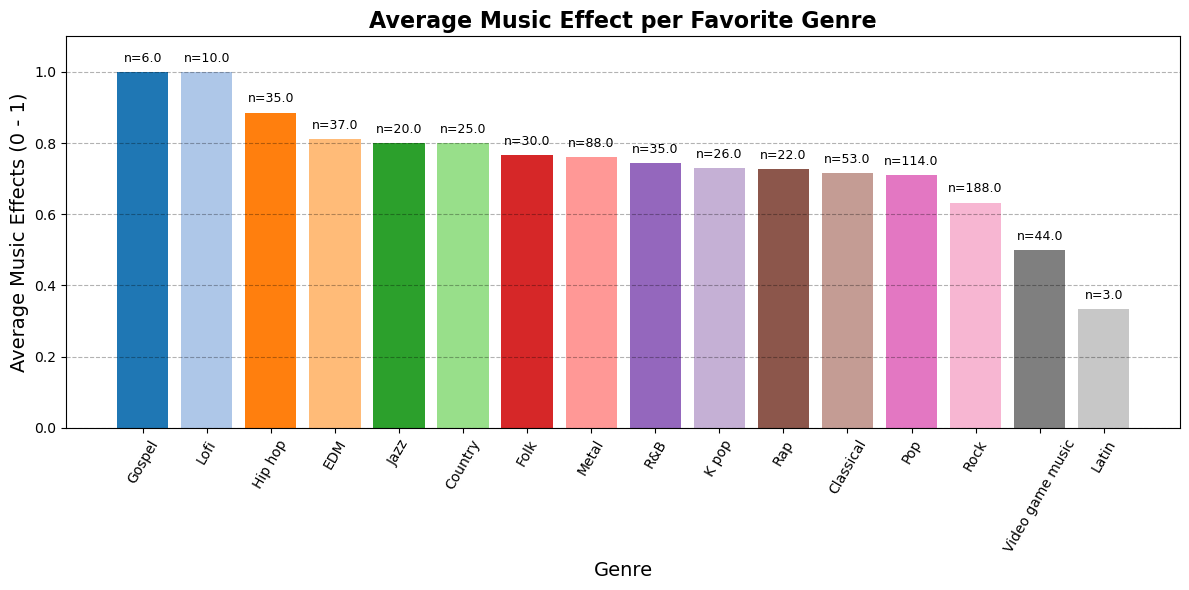

In [84]:
# Calculate and plot average music effect per genre

avg_effect_genre = df.groupby(by='Fav genre')['Music_effects_int'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(x=avg_effect_genre.index, height=avg_effect_genre['mean'], color = [genre_colors[genre] for genre in genre_list])
plt.grid(axis='y', alpha=0.3, color='black', linestyle='--')

plt.title('Average Music Effect per Favorite Genre', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Music Effects (0 - 1)', fontsize=14)
plt.xticks(rotation=60)

# Plot count of each genre
for i, (genre, row) in enumerate(avg_effect_genre.iterrows()):
    plt.text(x=i, y=row['mean']+0.02, s=f"n={row['count']}", ha='center', va='bottom', fontsize=9)

plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'avg_music_effect_fav_genre.png', dpi=300, bbox_inches='tight')
plt.show()

This bar chart reveals that respondents who favor genres such as Gospel, Lofi, and Hip-hop **report a higher average music effect** than respondents who favor Rock, Video game music, and Latin music. However this comparison may be influenced by **class imbalance**, as indicated by `n`, which represents the frequency of each genre. 
To test whether these observed differences are statistically significant, we apply the non-parametric **Kruskal-Wallis h-test** which is appropriate for ordinal data and *does not* assume normality.

- **Null hypothesis**: The distribution of `Music effect` scores is the same across all favorite genres.
- **Alternative hypothesis**: At least one genre group has a significantly different distribution of `Music effect` scores.

In [104]:
# Perform kruskal-wallis test

grouped_effects_values = [group['Music_effects_int'].values for name, group in df.groupby('Fav genre')]

h_stat, p_value = stats.kruskal(*grouped_effects_values)
print(f"H-statistic: {h_stat:.3f}, p-value: {p_value:.3f}")

H-statistic: 25.347, p-value: 0.045


Since the the test's p-value is less than 0.05, we can **reject the null hypothesis**. This implies that there is **at least one** genre group with a significantly different distribution of `Music effect` scores. The Post-Hoc Test **Dunn's Q Test** will be performed to perform a pairwise comparison between genres to identify which genres differ significantly.

In [111]:
# Performs dunn's test

dunn_q = sp.posthoc_dunn(a=df, val_col='Music_effects_int', group_col='Fav genre', p_adjust='bonferroni')
dunn_q

,Classical,Country,EDM,Folk,Gospel,Hip hop,Jazz,K pop,Latin,Lofi,Metal,Pop,R&B,Rap,Rock,Video game music
Classical,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000
Country,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000
EDM,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000
Folk,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000
Gospel,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000
Hip hop,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,0.820675,0.222697
Jazz,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000
K pop,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000
Latin,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000
Lofi,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,0.754558


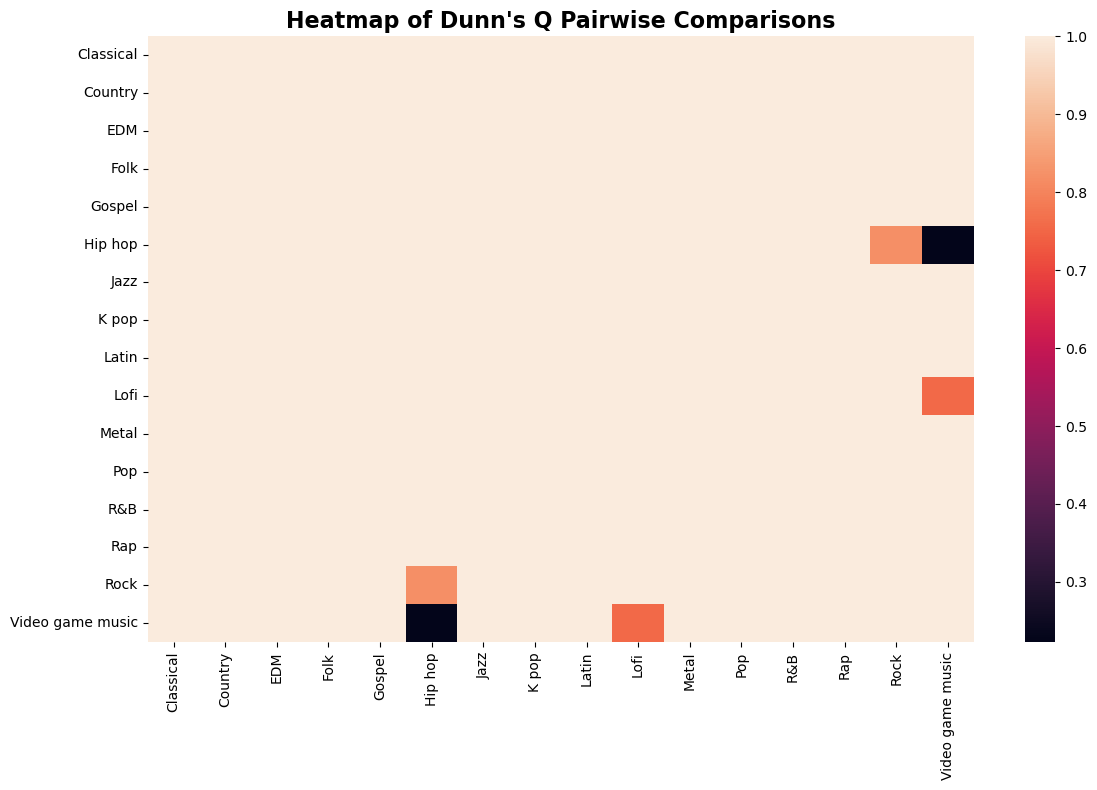

In [116]:
# Plot heatmap of dunn test results

plt.figure(figsize=(12,8))
sns.heatmap(dunn_q)
plt.title("Heatmap of Dunn's Q Pairwise Comparisons", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'heatmap_dunns_p_values.png', dpi=300, bbox_inches='tight')
plt.show()

Although the Kruskal-Wallis test demonstrated that there may be a statistical difference in `Music effects` across favorite genres, the Dunn's test **did not** find any **pairwise differences** that remained statistically significant after correcting for multiple comparisons. 

#### Summary

- There is **no significant correlation** between `Music effects` and continuous features such as `BPM`, `Hours per day`, and `Age`.
- Although individuals who reported listening to music for **more hours per day** more frequently reported *No effect* or *Improve* rather than *Worsen*, a **One-Way ANOVA** revealed **no statistically significant difference** in `Music effects` between listening-time groups.
- Respondents who favor genres such as Gospel, Lofi, and Hip-Hop reported **higher average music effect scores** than respondents who favor genres such as Rock, Video game music, and Latin music.
  - A **Kruskal-Wallis h-test** indicated that there are **significant differences** in the distribution of `Music effects` across favorite genres.
  - However, a post-hoc **Dunn's Test** found that **no pairwise genre comparisons** reached statistical significance after correcting for multiple comparisons.